# **Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading the Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE303 Project Dataset/Delhi_Dataset.csv')
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,delhi,1/05/2019,41.4,26.0,34.3,42.0,26.0,34.3,14.5,32.3,...,26.8,10,NaN,2019-05-01T05:40:51,2019-05-01T18:56:09,0.88,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"42182099999,42176099999,VIDP,42139099999,42181..."
1,delhi,2/05/2019,39.7,27.4,32.7,47.2,27.3,33.9,16.2,37.8,...,23.6,9,NaN,2019-05-02T05:40:00,2019-05-02T18:56:45,0.91,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"42182099999,42176099999,VIDP,42139099999,42181..."
2,delhi,3/05/2019,38.9,24.2,30.6,42.2,24.2,31.5,16.8,44.8,...,24.5,9,NaN,2019-05-03T05:39:11,2019-05-03T18:57:21,0.95,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"42182099999,42176099999,VIDP,42139099999,42181..."
3,delhi,4/05/2019,39.0,23.8,31.7,38.0,23.8,31.0,13.0,36.1,...,28.3,10,NaN,2019-05-04T05:38:22,2019-05-04T18:57:57,0.98,Clear,Clear conditions throughout the day.,clear-day,"42182099999,42176099999,VIDP,42139099999,42181..."
4,delhi,5/05/2019,39.2,21.6,32.0,39.0,21.6,31.2,10.5,28.5,...,28.5,10,NaN,2019-05-05T05:37:35,2019-05-05T18:58:34,0.00,Clear,Clear conditions throughout the day.,clear-day,"42182099999,42176099999,VIDP,42139099999,42181..."


# **Analysing the Dataset With the Help of Visualization and Also Preprocess the Data**

In [ ]:
df.shape

(1827, 33)

In [ ]:
df.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                  int64
snowdepth             int64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [ ]:
df.isnull().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1369
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk           985
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

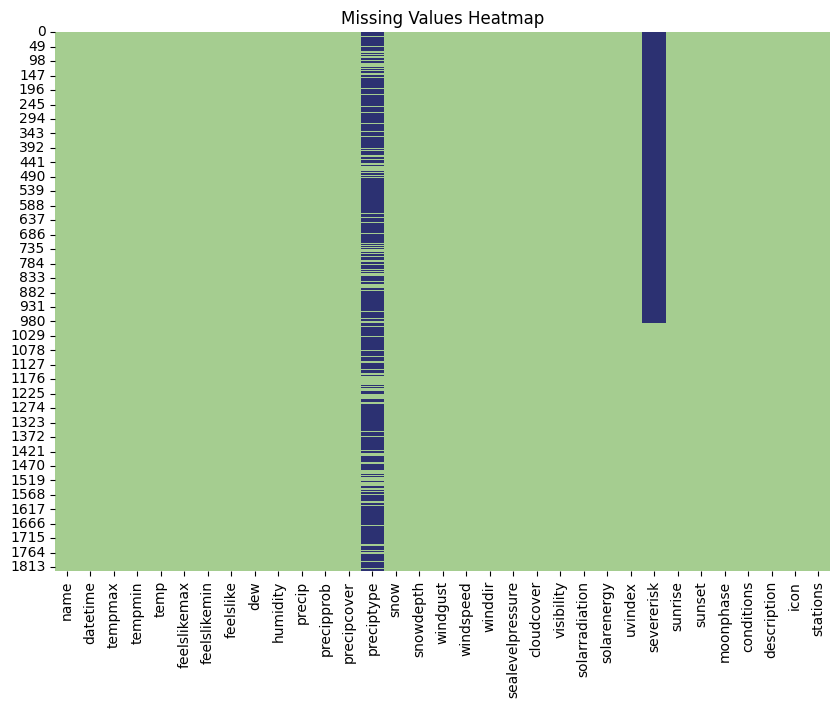

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))

sns.heatmap(df.isnull(), cbar = False, cmap = 'crest')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
df['icon'].value_counts()

icon
partly-cloudy-day    727
clear-day            611
rain                 416
fog                   71
wind                   2
Name: count, dtype: int64

In [ ]:
df['stations'].value_counts()

stations
42182099999,42176099999,VIDP,42139099999,42181099999                     1105
42182099999,42176099999,VIDP,42139099999,42181099999,VIDD                 510
42182099999,42176099999,VIDP,42139099999,42181099999,remote               128
42182099999,42176099999,VIDP,42139099999,42181099999,VIDD,remote           52
42182099999,VIDP,42139099999,42181099999,VIDD                               5
VIDP                                                                        5
42182099999,VIDP,42139099999,42181099999                                    5
42182099999,42176099999,VIDP,42139099999,42181099999,VIDD,42183099999       3
VIDP,42181099999                                                            2
42182099999,42176099999,42139099999,42181099999,VIDD,remote                 2
42182099999,VIDP,42181099999                                                2
VIDP,42181099999,remote                                                     1
42182099999,VIDP,42181099999,remote                    

In [ ]:
df['preciptype'].value_counts()

preciptype
rain    458
Name: count, dtype: int64

In [ ]:
df['preciptype'] = df['preciptype'].fillna("not rain")
df['preciptype'].value_counts()

preciptype
not rain    1369
rain         458
Name: count, dtype: int64

In [ ]:
df['severerisk'] = df['severerisk'].fillna(0)
df['severerisk'].value_counts()

severerisk
0.0     985
10.0    723
30.0    106
60.0     13
Name: count, dtype: int64

In [ ]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,...,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,30.894472,19.900985,25.056212,33.809962,20.796333,26.941981,16.503558,64.835906,2.676631,22.769568,...,15.585112,209.342967,1008.908484,36.849918,2.735851,214.754023,18.549754,7.597701,6.124795,0.482939
std,7.140335,7.458116,7.306638,9.855861,8.924862,9.365985,6.694503,18.090293,11.659929,41.945996,...,5.640235,92.878468,6.893502,27.550583,1.100851,62.011106,5.365150,1.589828,8.940706,0.288674
min,9.100000,3.000000,6.500000,7.900000,1.800000,5.700000,1.200000,17.800000,0.000000,0.000000,...,5.400000,0.800000,993.200000,0.000000,0.200000,4.100000,0.100000,0.000000,0.000000,0.000000
25%,25.800000,13.100000,18.900000,25.800000,13.100000,18.900000,11.000000,54.200000,0.000000,0.000000,...,11.200000,107.800000,1002.850000,9.800000,2.100000,168.300000,14.500000,7.000000,0.000000,0.250000
50%,32.600000,21.300000,27.300000,34.500000,21.300000,27.800000,15.100000,66.900000,0.000000,0.000000,...,14.800000,259.900000,1008.600000,36.900000,2.900000,211.800000,18.300000,8.000000,0.000000,0.480000
75%,36.000000,26.650000,30.900000,42.400000,26.500000,35.100000,23.400000,77.950000,0.000000,0.000000,...,18.400000,281.800000,1015.200000,58.100000,3.400000,263.600000,22.800000,9.000000,10.000000,0.745000
max,47.000000,33.600000,39.000000,57.700000,40.600000,47.000000,27.900000,99.300000,148.012000,100.000000,...,63.400000,359.100000,1024.200000,100.000000,17.900000,335.200000,29.100000,10.000000,60.000000,0.980000


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], format = "%d/%m/%Y")
df['datetime']

0      2019-05-01
1      2019-05-02
2      2019-05-03
3      2019-05-04
4      2019-05-05
          ...    
1822   2024-04-26
1823   2024-04-27
1824   2024-04-28
1825   2024-04-29
1826   2024-04-30
Name: datetime, Length: 1827, dtype: datetime64[ns]

In [ ]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df.dtypes

name                        object
datetime            datetime64[ns]
tempmax                    float64
tempmin                    float64
temp                       float64
feelslikemax               float64
feelslikemin               float64
feelslike                  float64
dew                        float64
humidity                   float64
precip                     float64
precipprob                   int64
precipcover                float64
preciptype                  object
snow                         int64
snowdepth                    int64
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
solarradiation             float64
solarenergy                float64
uvindex                      int64
severerisk                 float64
sunrise                     object
sunset                      object
moonphase           

## **Year wise Temperature**

<ipython-input-16-4ac7f6b3fddc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['year'], y=df['temp'], palette = 'Spectral')


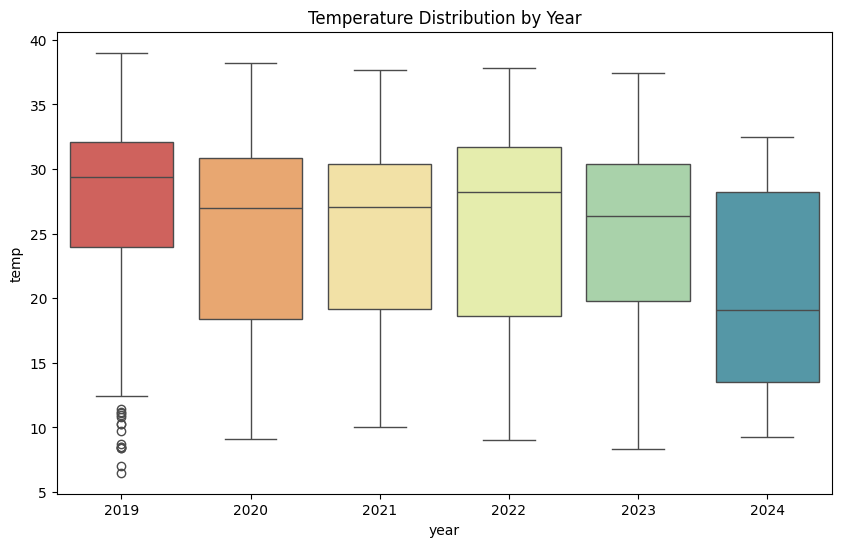

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x=df['year'], y=df['temp'], palette = 'Spectral')
plt.title('Temperature Distribution by Year')
plt.show()

## **Month wise Temperature**

<ipython-input-17-002bc7458166>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df['month'], y = df['temp'], palette = 'Spectral')


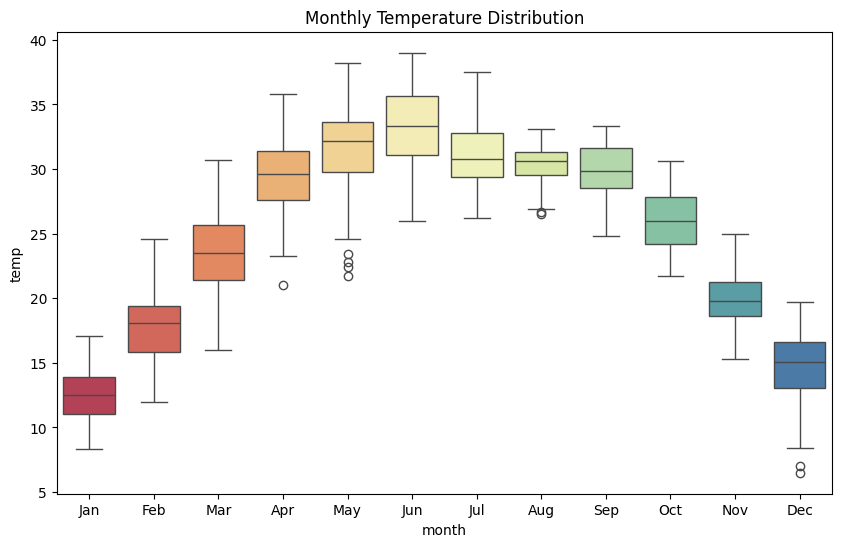

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = df['month'], y = df['temp'], palette = 'Spectral')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'])
ax.set_title('Monthly Temperature Distribution')
plt.show()

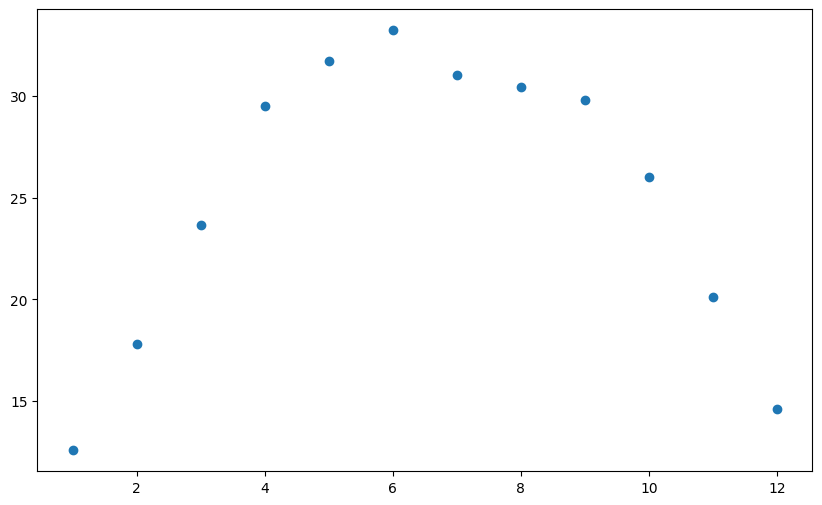

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
plt.scatter(df.groupby('month')['temp'].median().index, df.groupby('month')['temp'].mean())

plt.show()

## **Year wise Precipitation**

<ipython-input-19-3427a451f089>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['year'], y=df['precip'], palette = 'Spectral')


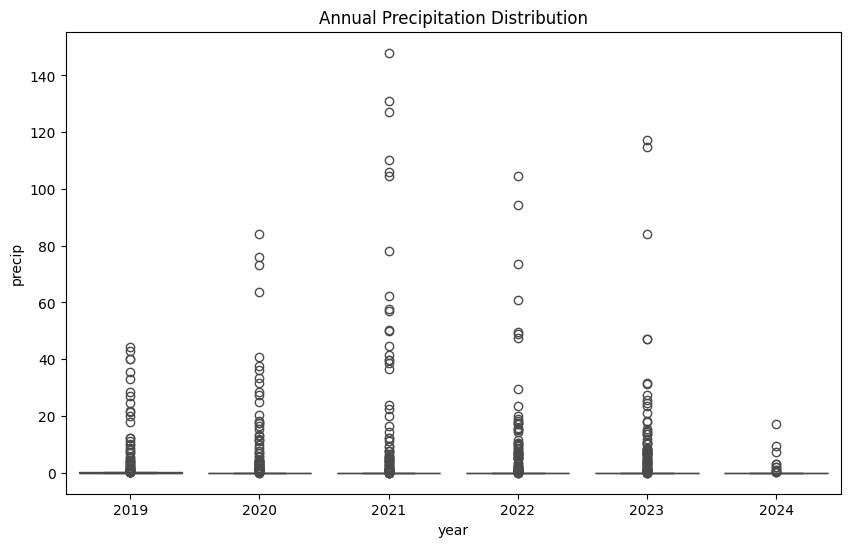

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x=df['year'], y=df['precip'], palette = 'Spectral')
ax.set_title('Annual Precipitation Distribution')
plt.show()

## **Month wise Precipitation**

<ipython-input-20-23c246930356>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['month'], y=df['precip'], palette = 'Spectral')


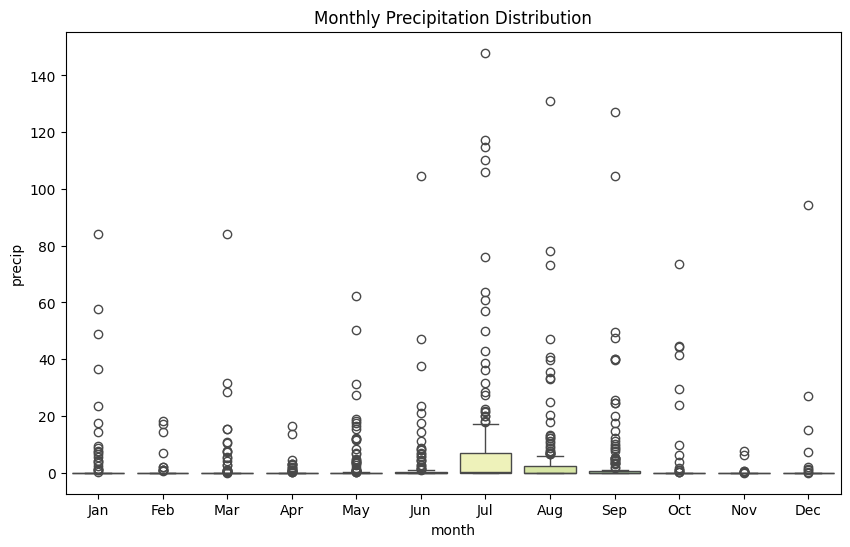

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x=df['month'], y=df['precip'], palette = 'Spectral')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'])
ax.set_title('Monthly Precipitation Distribution')
plt.show()

## Visualization of Numerical Features

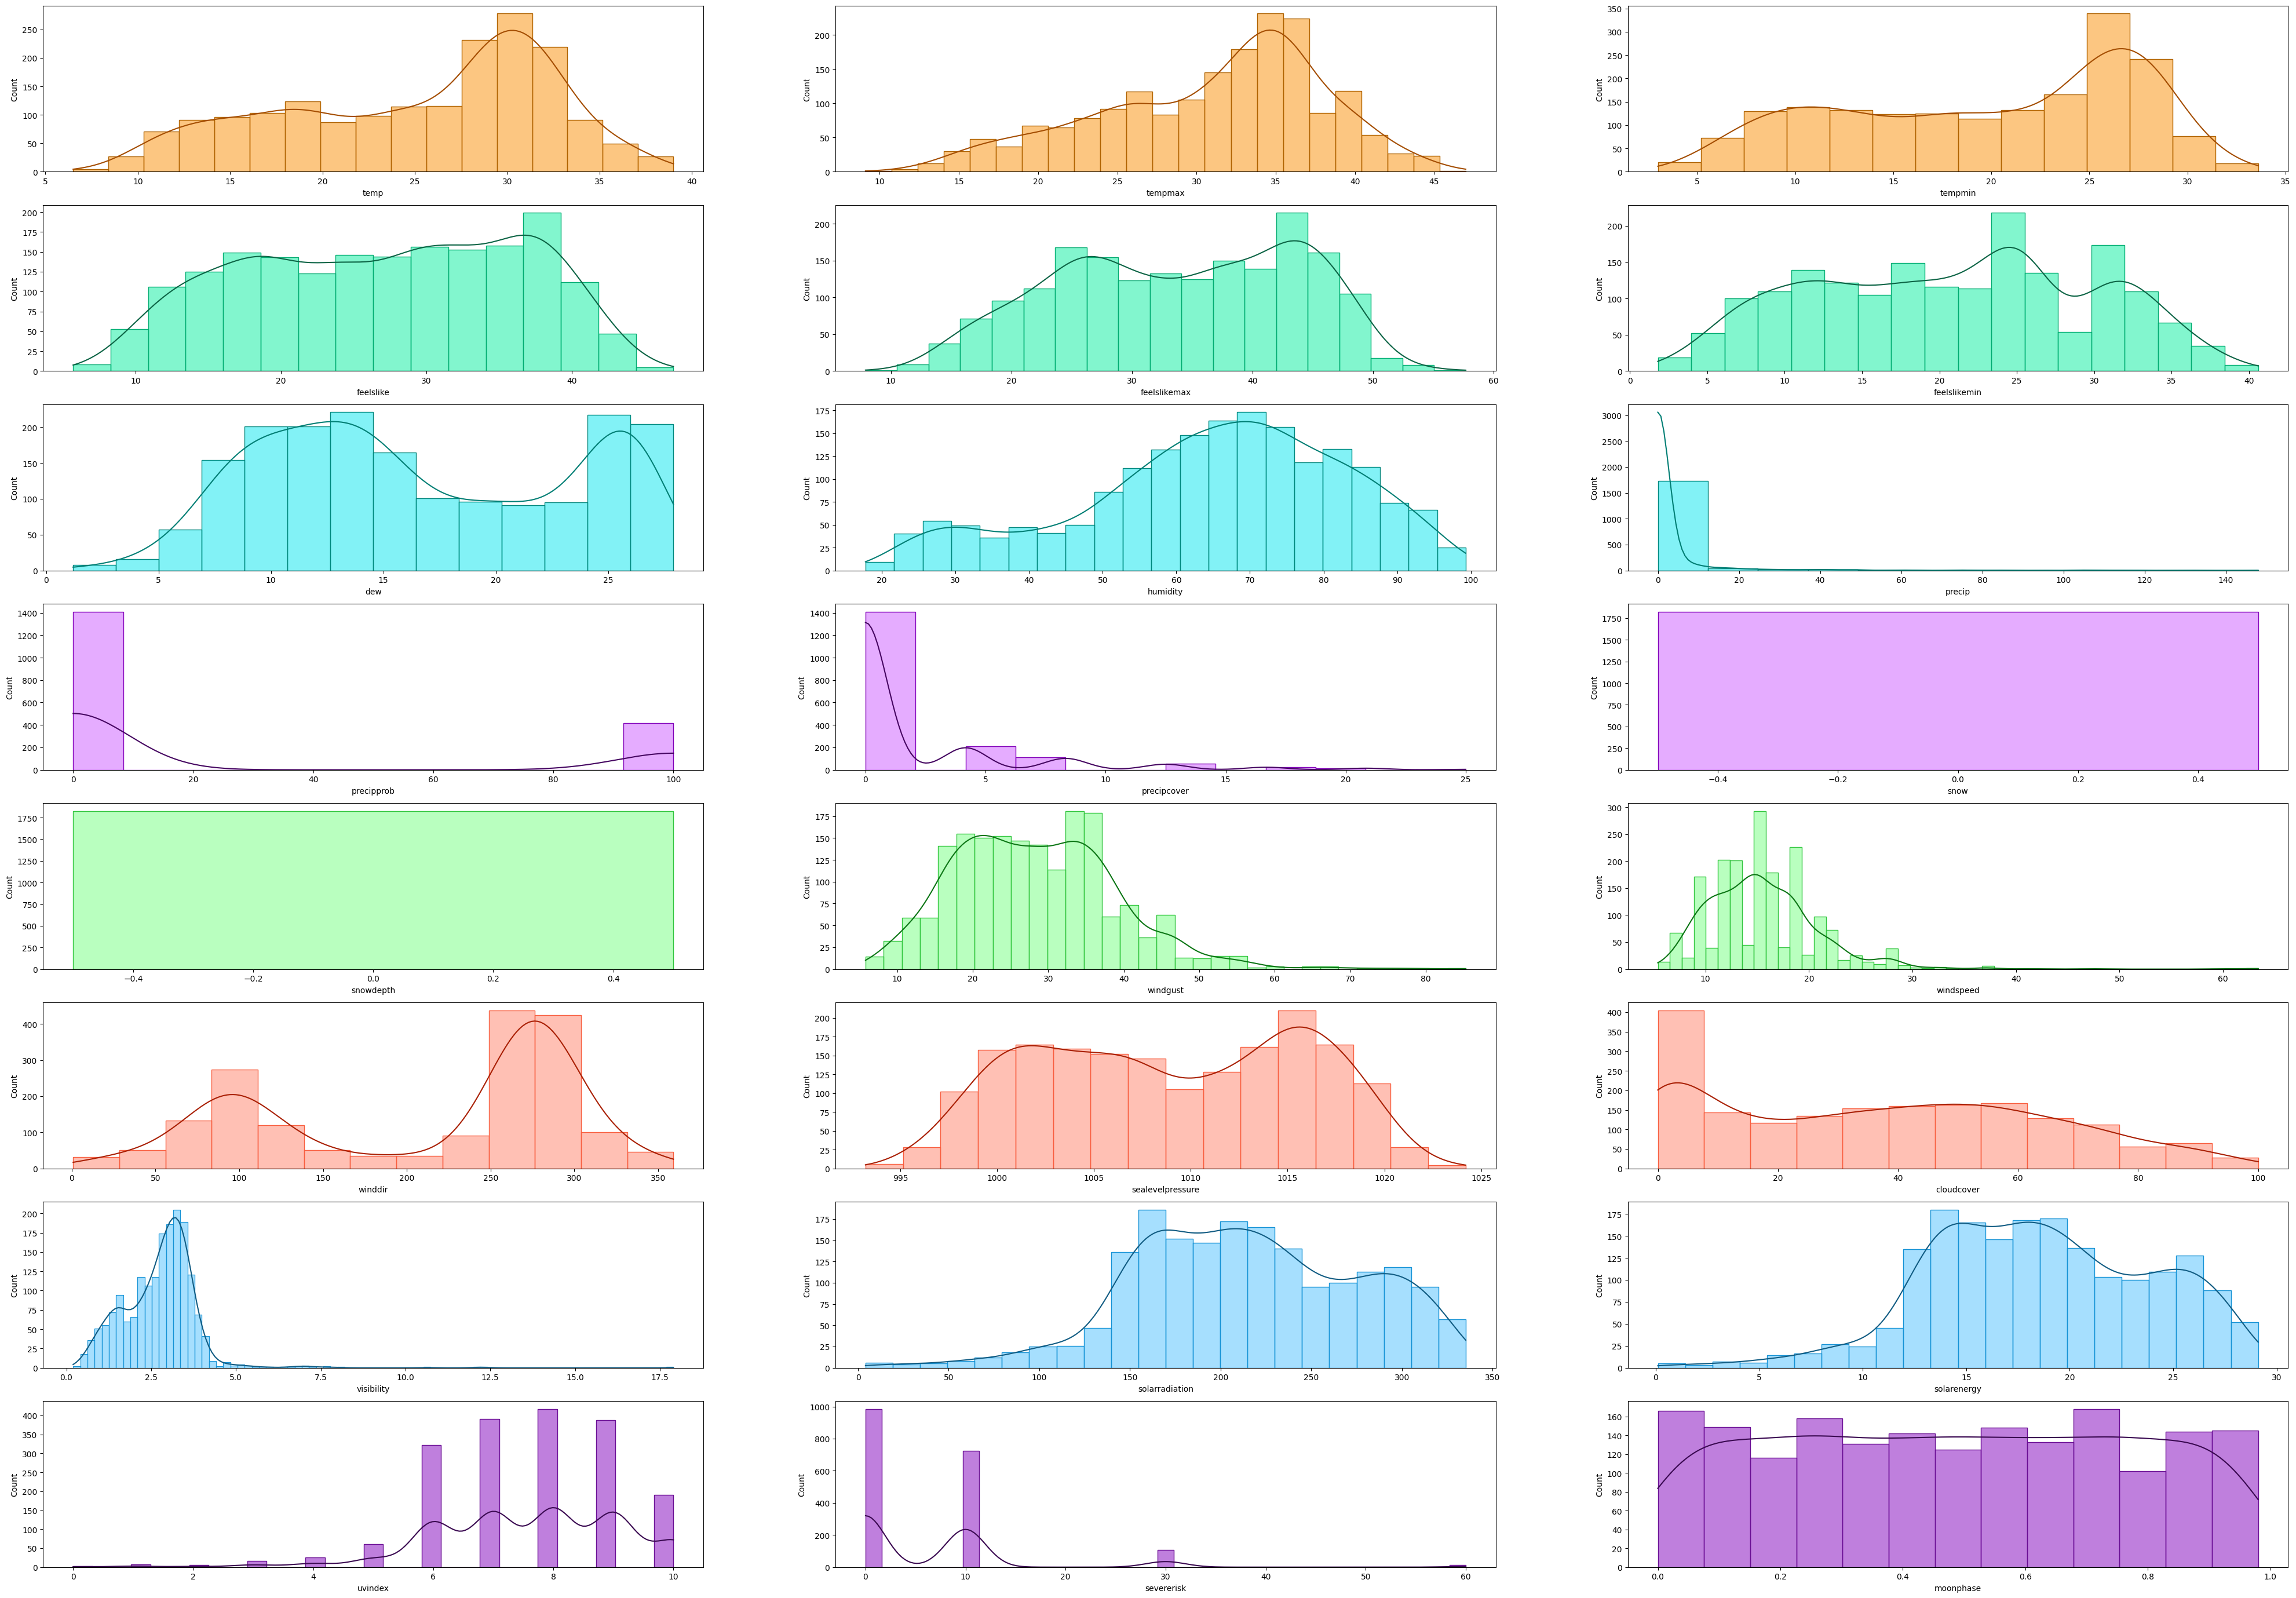

In [ ]:
fig, ax = plt.subplots(8, 3, figsize = (50,35))

sns.histplot(df['temp'], kde = True, color = '#FB8E04', edgecolor = '#AF6200', ax = ax[0][0])
ax[0, 0].lines[0].set_color('#A44D00')

sns.histplot(df['tempmax'], kde = True, color = '#FB8E04', edgecolor = '#AF6200', ax = ax[0][1])
ax[0, 1].lines[0].set_color('#A44D00')

sns.histplot(df['tempmin'], kde = True, color = '#FB8E04', edgecolor = '#AF6200', ax = ax[0][2])
ax[0, 2].lines[0].set_color('#A44D00')

sns.histplot(df['feelslike'], kde = True, color = '#07EF9E', edgecolor = '#02AC71', ax = ax[1][0])
ax[1, 0].lines[0].set_color('#0C6445')

sns.histplot(df['feelslikemax'], kde = True, color = '#07EF9E', edgecolor = '#02AC71', ax = ax[1][1])
ax[1, 1].lines[0].set_color('#0C6445')

sns.histplot(df['feelslikemin'], kde = True, color = '#07EF9E', edgecolor = '#02AC71', ax = ax[1][2])
ax[1, 2].lines[0].set_color('#0C6445')

sns.histplot(df['dew'], kde = True, color = '#07E7EE', edgecolor = '#00877D', ax = ax[2][0])
ax[2, 0].lines[0].set_color('#007E74')

sns.histplot(df['humidity'], kde = True, color = '#07E7EE', edgecolor = '#00877D', ax = ax[2][1])
ax[2, 1].lines[0].set_color('#007E74')

sns.histplot(df['precip'], kde = True, color = '#07E7EE', edgecolor = '#00877D', ax = ax[2][2])
ax[2, 2].lines[0].set_color('#007E74')

sns.histplot(df['precipprob'], kde = True, color = '#CD5AFF', edgecolor = '#8000B8', ax = ax[3][0])
ax[3, 0].lines[0].set_color('#450561')

sns.histplot(df['precipcover'], kde = True, color = '#CD5AFF', edgecolor = '#8000B8', ax = ax[3][1])
ax[3, 1].lines[0].set_color('#450561')

sns.histplot(df['snow'], kde = True, color = '#CD5AFF', edgecolor = '#8000B8', ax = ax[3][2])

sns.histplot(df['snowdepth'], kde = True, color = '#74FF80', edgecolor = '#31C53E', ax = ax[4][0])

sns.histplot(df['windgust'], kde = True, color = '#74FF80', edgecolor = '#31C53E', ax = ax[4][1])
ax[4, 1].lines[0].set_color('#0C7615')

sns.histplot(df['windspeed'], kde = True, color = '#74FF80', edgecolor = '#31C53E', ax = ax[4][2])
ax[4, 2].lines[0].set_color('#0C7615')

sns.histplot(df['winddir'], kde = True, color = '#FF836A', edgecolor = '#F85E3F', ax = ax[5][0])
ax[5, 0].lines[0].set_color('#A91F03')

sns.histplot(df['sealevelpressure'], kde = True, color = '#FF836A', edgecolor = '#F85E3F', ax = ax[5][1])
ax[5, 1].lines[0].set_color('#A91F03')

sns.histplot(df['cloudcover'], kde = True, color = '#FF836A', edgecolor = '#F85E3F', ax = ax[5][2])
ax[5, 2].lines[0].set_color('#A91F03')

sns.histplot(df['visibility'], kde = True, color = '#4FC1FE', edgecolor = '#1592D5', ax = ax[6][0])
ax[6, 0].lines[0].set_color('#115C83')

sns.histplot(df['solarradiation'], kde = True, color = '#4FC1FE', edgecolor = '#1592D5', ax = ax[6][1])
ax[6, 1].lines[0].set_color('#115C83')

sns.histplot(df['solarenergy'], kde = True, color = '#4FC1FE', edgecolor = '#1592D5', ax = ax[6][2])
ax[6, 2].lines[0].set_color('#115C83')

sns.histplot(df['uvindex'], kde = True, color = '#8101BD', edgecolor = '#690E93', ax = ax[7][0])
ax[7, 0].lines[0].set_color('#3A0951')

sns.histplot(df['severerisk'], kde = True, color = '#8101BD', edgecolor = '#690E93', ax = ax[7][1])
ax[7, 1].lines[0].set_color('#3A0951')

sns.histplot(df['moonphase'], kde = True, color = '#8101BD', edgecolor = '#690E93', ax = ax[7][2])
ax[7, 2].lines[0].set_color('#3A0951')

plt.show()

## **Visualization of Categorical Features**

<ipython-input-22-72333cca4c39>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='icon',y='temp',data=df ,palette='YlGnBu', ax = ax[1])


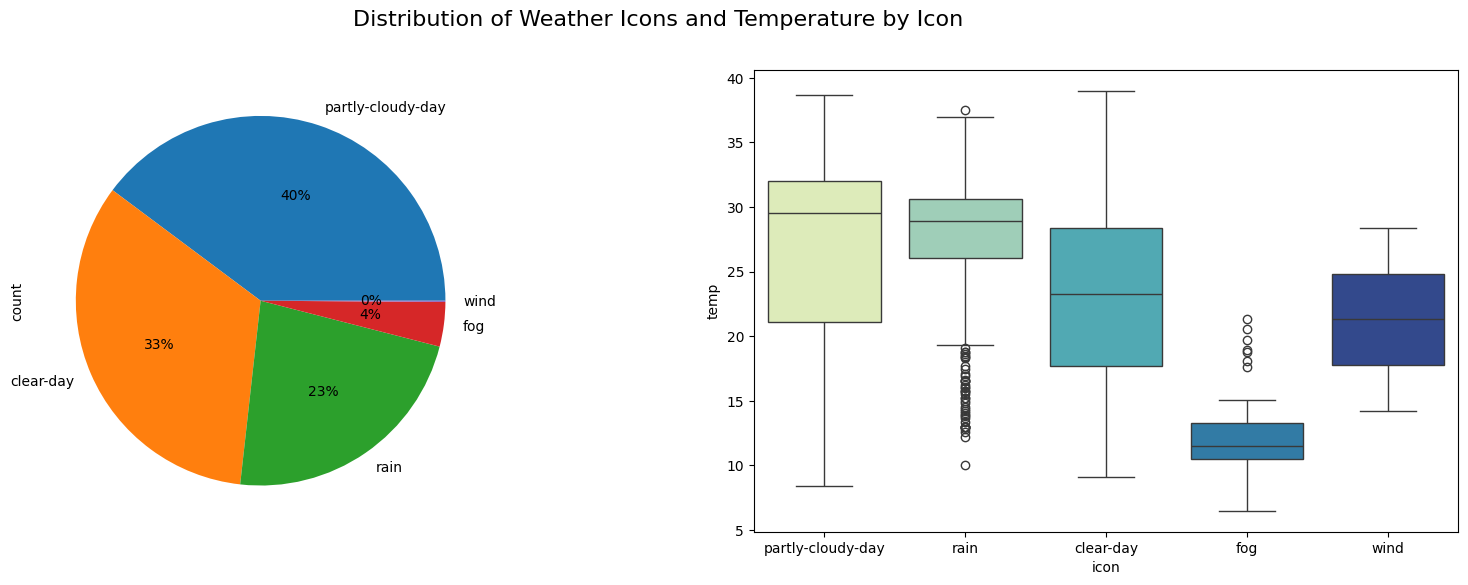

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20,6))

df['icon'].value_counts().plot(kind = 'pie', autopct='%1.0f%%', ax = ax[0])

sns.boxplot(x='icon',y='temp',data=df ,palette='YlGnBu', ax = ax[1])
fig.suptitle('Distribution of Weather Icons and Temperature by Icon', fontsize=16)
plt.show()

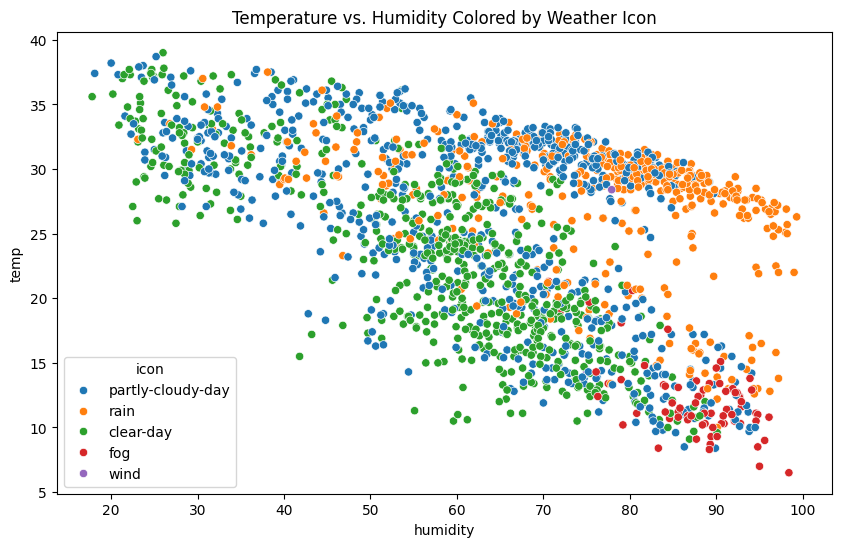

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

sns.scatterplot(x= 'humidity', y= 'temp', data=df, hue='icon')
plt.title('Temperature vs. Humidity Colored by Weather Icon')
plt.show()

# **Prediction Model of Temperature of Delhi**

## **Copying Dataset**

In [ ]:
df_del_temp = df.copy()
df_del_temp = df_del_temp.drop(['name', 'datetime', 'snow', 'snowdepth', 'feelslike', 'tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'precipprob', 'preciptype'], axis = 'columns')
df_del_temp['median_temp_month'] = df['month'].map(df.groupby('month')['temp'].median())

In [ ]:
df_del_temp.head()

,temp,dew,humidity,precip,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,...,sunrise,sunset,moonphase,conditions,description,icon,stations,year,month,median_temp_month
0,34.3,14.5,32.3,0.000,0.00,33.5,11.2,53.3,1000.4,27.1,...,2019-05-01T05:40:51,2019-05-01T18:56:09,0.88,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"42182099999,42176099999,VIDP,42139099999,42181...",2019,5,32.2
1,32.7,16.2,37.8,0.000,0.00,43.6,21.0,52.4,1002.5,52.4,...,2019-05-02T05:40:00,2019-05-02T18:56:45,0.91,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"42182099999,42176099999,VIDP,42139099999,42181...",2019,5,32.2
2,30.6,16.8,44.8,4.448,4.17,33.5,47.7,76.8,1004.9,44.3,...,2019-05-03T05:39:11,2019-05-03T18:57:21,0.95,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"42182099999,42176099999,VIDP,42139099999,42181...",2019,5,32.2
3,31.7,13.0,36.1,0.000,0.00,37.1,21.6,288.0,1006.7,15.5,...,2019-05-04T05:38:22,2019-05-04T18:57:57,0.98,Clear,Clear conditions throughout the day.,clear-day,"42182099999,42176099999,VIDP,42139099999,42181...",2019,5,32.2
4,32.0,10.5,28.5,0.000,0.00,41.4,18.0,268.9,1007.0,7.1,...,2019-05-05T05:37:35,2019-05-05T18:58:34,0.00,Clear,Clear conditions throughout the day.,clear-day,"42182099999,42176099999,VIDP,42139099999,42181...",2019,5,32.2


In [ ]:
df_del_temp.dtypes

temp                 float64
dew                  float64
humidity             float64
precip               float64
precipcover          float64
windgust             float64
windspeed            float64
winddir              float64
sealevelpressure     float64
cloudcover           float64
visibility           float64
solarradiation       float64
solarenergy          float64
uvindex                int64
severerisk           float64
sunrise               object
sunset                object
moonphase            float64
conditions            object
description           object
icon                  object
stations              object
year                   int32
month                  int32
median_temp_month    float64
dtype: object

In [ ]:
df_del_temp['sunrise'] = LabelEncoder().fit_transform(df_del_temp['sunrise'])
df_del_temp['sunset'] = LabelEncoder().fit_transform(df_del_temp['sunset'])
df_del_temp['icon'] = LabelEncoder().fit_transform(df_del_temp['icon'])
df_del_temp['conditions'] = LabelEncoder().fit_transform(df_del_temp['conditions'])
df_del_temp['stations'] = LabelEncoder().fit_transform(df_del_temp['stations'])
df_del_temp['description'] = LabelEncoder().fit_transform(df_del_temp['description'])
df_del_temp.head()

,temp,dew,humidity,precip,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,...,sunrise,sunset,moonphase,conditions,description,icon,stations,year,month,median_temp_month
0,34.3,14.5,32.3,0.000,0.00,33.5,11.2,53.3,1000.4,27.1,...,0,0,0.88,1,26,2,2,2019,5,32.2
1,32.7,16.2,37.8,0.000,0.00,43.6,21.0,52.4,1002.5,52.4,...,1,1,0.91,1,26,2,2,2019,5,32.2
2,30.6,16.8,44.8,4.448,4.17,33.5,47.7,76.8,1004.9,44.3,...,2,2,0.95,4,21,3,2,2019,5,32.2
3,31.7,13.0,36.1,0.000,0.00,37.1,21.6,288.0,1006.7,15.5,...,3,3,0.98,0,6,0,2,2019,5,32.2
4,32.0,10.5,28.5,0.000,0.00,41.4,18.0,268.9,1007.0,7.1,...,4,4,0.00,0,6,0,2,2019,5,32.2


## **Correlation Heatmap**

<Axes: >

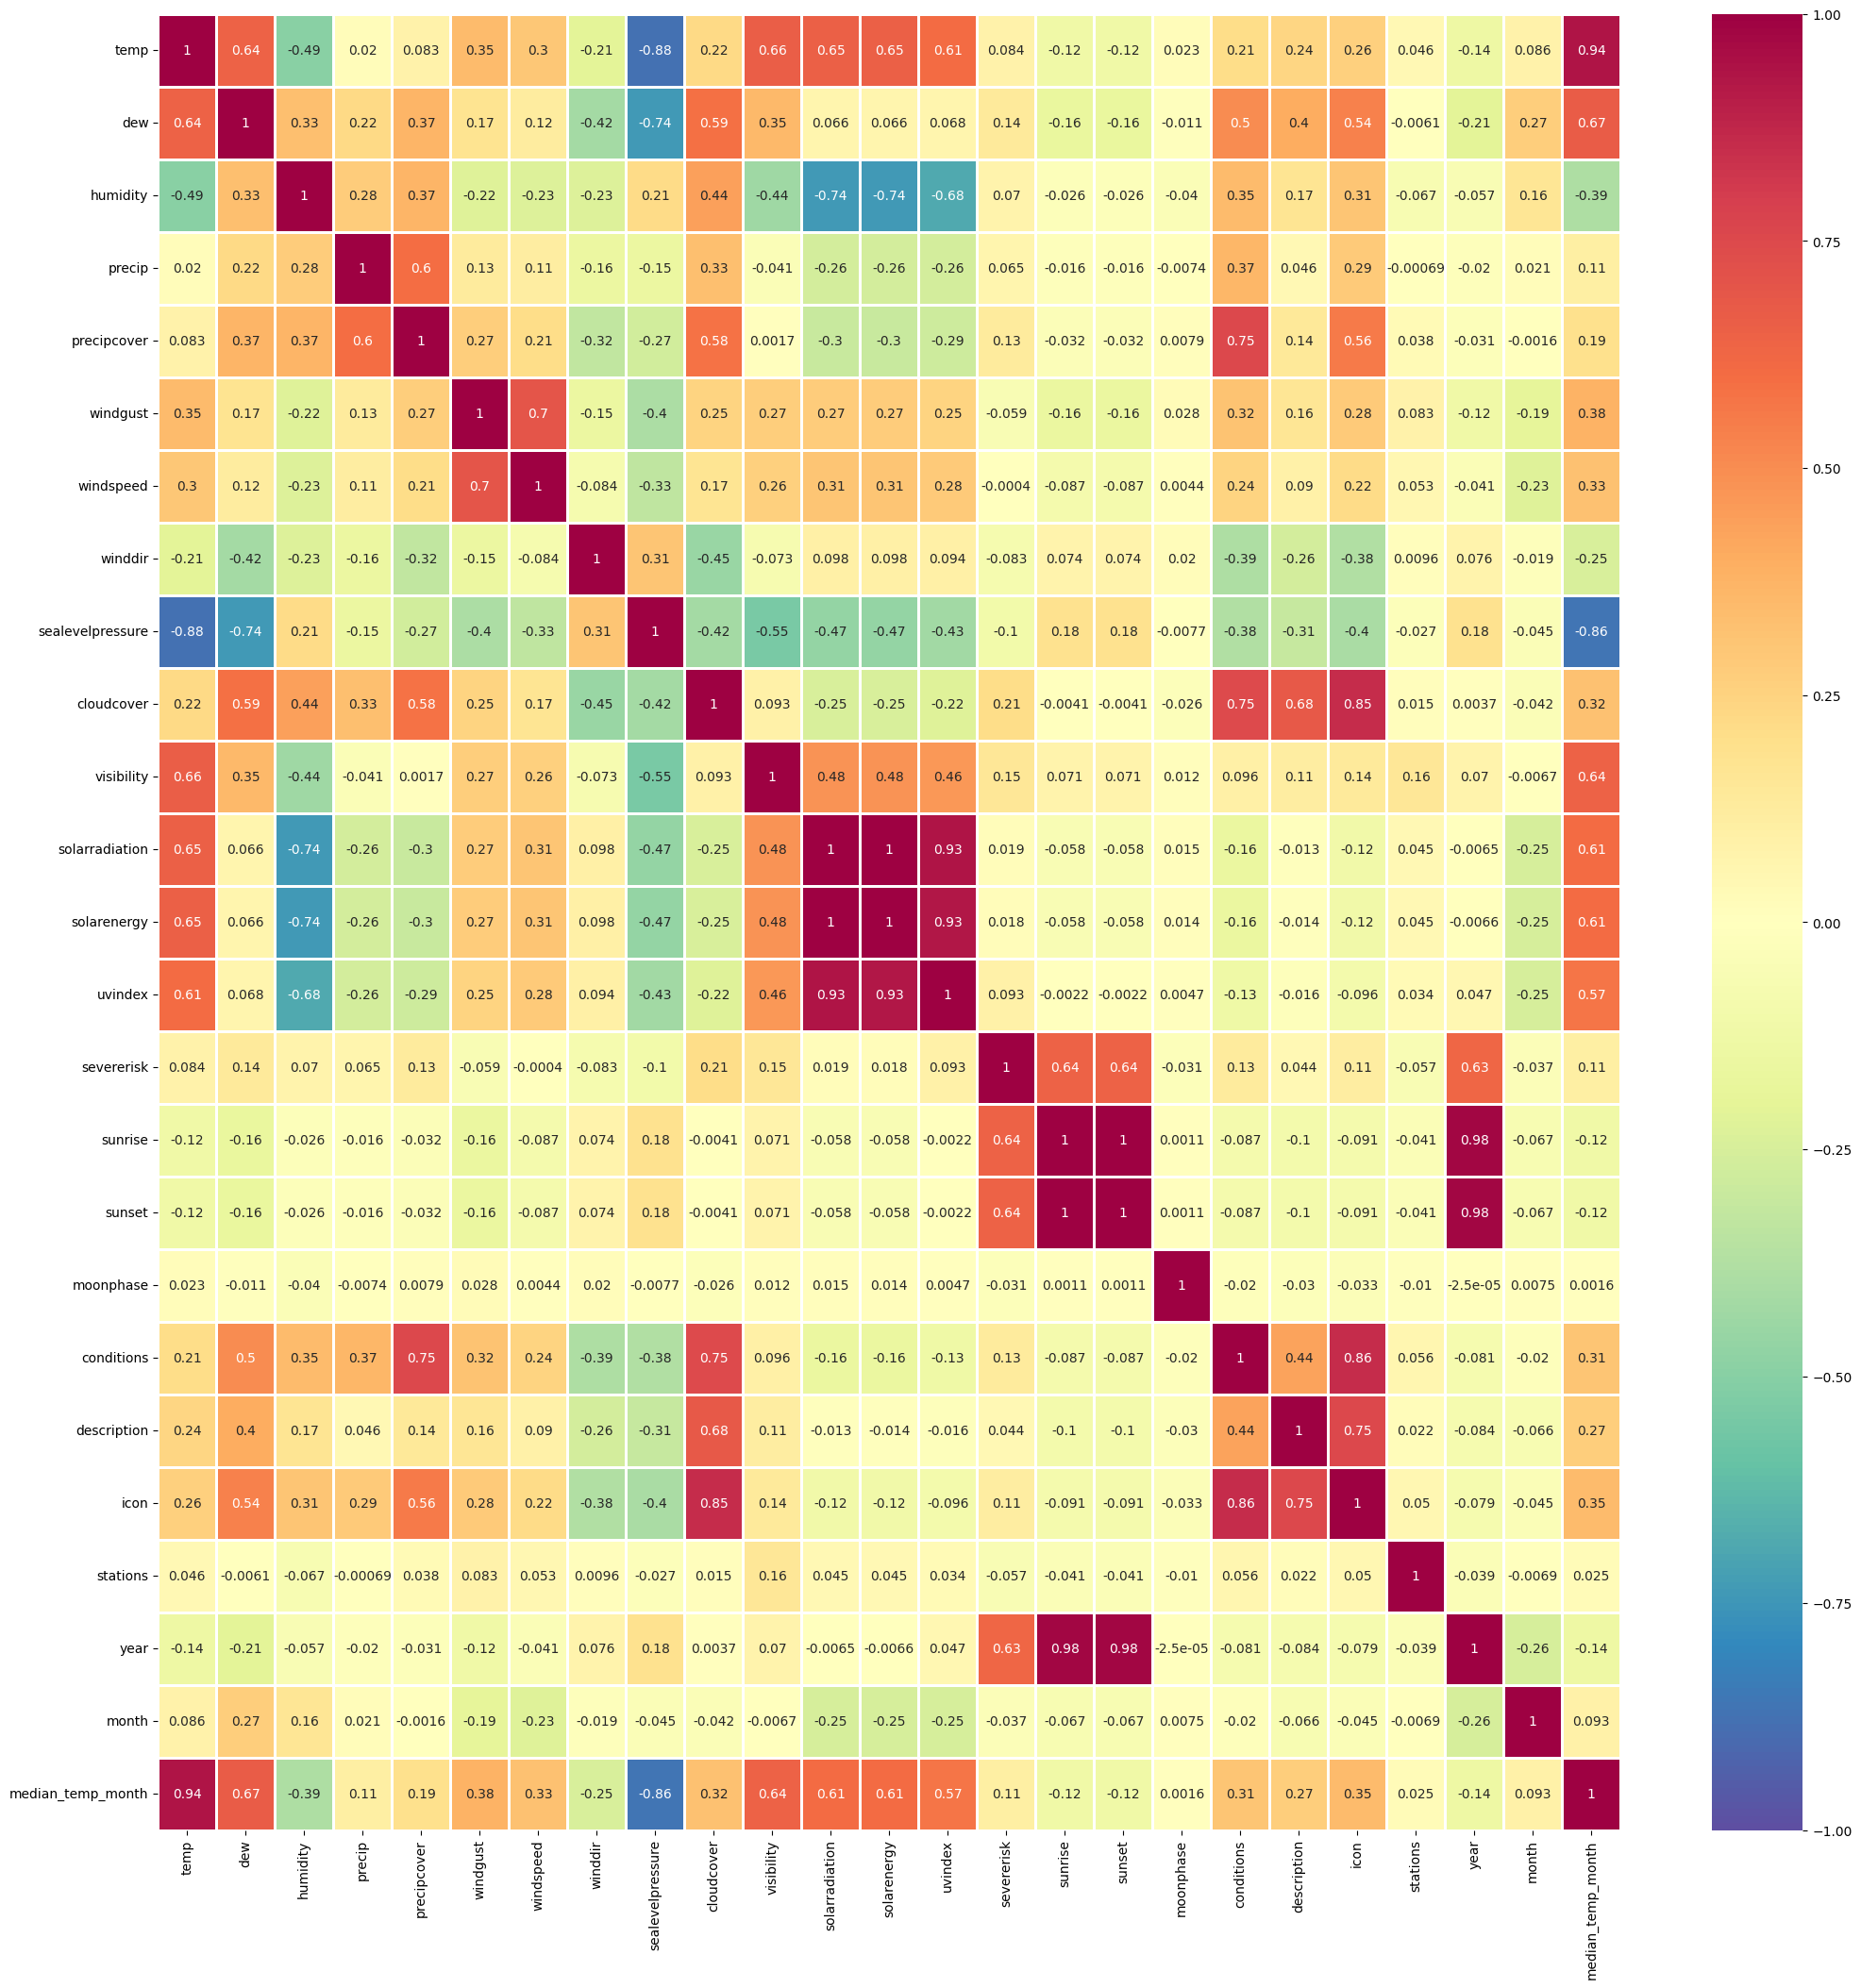

In [ ]:
fig, ax = plt.subplots(figsize = (25,25))

sns.heatmap(df_del_temp.corr(), annot=True, cmap='Spectral_r', vmin = -1, vmax = 1, linewidths=1)

## **Prediction Model By Taking the Correlation >= 0.4 and Correlation <= -0.4**

In [ ]:
correlation = df_del_temp.corr()['temp']
correlation

temp                 1.000000
dew                  0.642677
humidity            -0.493830
precip               0.019726
precipcover          0.083432
windgust             0.349044
windspeed            0.300840
winddir             -0.208375
sealevelpressure    -0.875482
cloudcover           0.221876
visibility           0.663309
solarradiation       0.650998
solarenergy          0.650824
uvindex              0.606327
severerisk           0.084092
sunrise             -0.124068
sunset              -0.124068
moonphase            0.022585
conditions           0.210026
description          0.235279
icon                 0.264582
stations             0.046245
year                -0.135686
month                0.085651
median_temp_month    0.936817
Name: temp, dtype: float64

In [ ]:
drop_columns = correlation[abs(correlation) < 0.4].index.tolist()
drop_columns
df_temporary = df['month']
df_del_temp = df_del_temp.drop(columns = drop_columns)
df_del_temp['month'] = df_temporary

In [ ]:
df_del_temp.dtypes

temp                 float64
dew                  float64
humidity             float64
sealevelpressure     float64
visibility           float64
solarradiation       float64
solarenergy          float64
uvindex                int64
median_temp_month    float64
month                  int32
dtype: object

In [ ]:
y = df_del_temp['temp']

In [ ]:
df_del = df_del_temp.drop('temp', axis = 'columns')
df_del.dtypes

dew                  float64
humidity             float64
sealevelpressure     float64
visibility           float64
solarradiation       float64
solarenergy          float64
uvindex                int64
median_temp_month    float64
month                  int32
dtype: object

In [ ]:
x = df_del

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [ ]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
print("Intecept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intecept:  169.7570139455942
Coefficients:


[('dew', 0.7495060751377421),
 ('humidity', -0.266597042235043),
 ('sealevelpressure', -0.14096314622012412),
 ('visibility', -0.08747571312386598),
 ('solarradiation', 0.013272937745043872),
 ('solarenergy', -0.17823191958263734),
 ('uvindex', -0.007519565434572767),
 ('median_temp_month', 0.13397024957679948),
 ('month', -0.029196875787423807)]

In [ ]:
y_pred_mlr = mlr.predict(x_test)
y_pred_mlr

array([36.6776689 , 32.69575034, 17.07969825, 34.26076199, 16.59108926,
       36.41051626, 28.67724961, 17.99738869, 31.95935529, 28.30292172,
       30.66436885, 26.65395819, 27.50396663, 18.67214172, 31.47600809,
       32.28486622, 28.41173367, 11.28552351, 29.56991831, 21.97851606,
       25.98239819, 23.48258328, 33.80745531, 29.70006676, 24.34704497,
       18.75940681, 26.99150847, 29.23739654, 18.31032406, 19.070401  ,
       33.26872108, 22.94164855, 29.86244556, 28.58662864, 34.19995784,
       27.2671373 , 35.29366213, 20.17760219, 31.65075636, 36.75730643,
       18.08669674, 27.90771163, 14.27542113, 29.5737942 , 21.06270328,
       33.4123398 , 26.01451895, 14.71163105, 12.96127373, 26.15262689,
       31.39276373, 20.1879792 , 13.46377055, 28.94713152, 29.22094528,
       14.28087491, 19.88934633, 36.1324423 , 24.75272226, 31.47554012,
       14.52352934, 23.82419078, 24.71764357, 21.71234578, 27.98134147,
       29.1986912 , 23.17504946, 29.8635267 , 28.7767719 , 35.62

In [ ]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value' : y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
414,36.1,36.677669
509,32.2,32.695750
571,15.3,17.079698
28,36.1,34.260762
1681,16.7,16.591089


In [ ]:
from sklearn import metrics

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(meanSqErr)
print('R squared : {:.6f}'. format(mlr.score(x, y)))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared : 0.982424
Mean Absolute Error: 0.7738000370758359
Mean Square Error: 1.0688627606533319
Root Mean Square Error: 1.0338581917522982


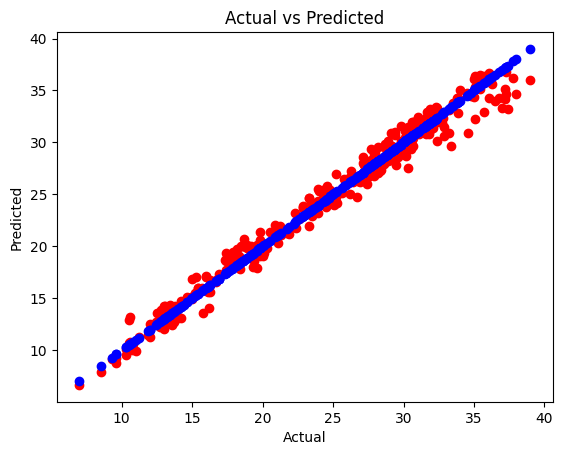

In [ ]:
plt.scatter(y_test, y_pred_mlr, color='red')
plt.scatter(y_test, y_test, color='blue')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# **Prediction Model of Precipitation of Delhi**

## **Copying Dataset**

In [ ]:
df_del_rain = df.copy()
df_del_rain = df_del_rain.drop(['name', 'datetime', 'snow', 'snowdepth', 'preciptype', 'precipprob'], axis = 'columns')
df_del_rain['median_precip_month'] = df['month'].map(df.groupby('month')['precip'].median())

In [ ]:
df_del_rain.dtypes

tempmax                float64
tempmin                float64
temp                   float64
feelslikemax           float64
feelslikemin           float64
feelslike              float64
dew                    float64
humidity               float64
precip                 float64
precipcover            float64
windgust               float64
windspeed              float64
winddir                float64
sealevelpressure       float64
cloudcover             float64
visibility             float64
solarradiation         float64
solarenergy            float64
uvindex                  int64
severerisk             float64
sunrise                 object
sunset                  object
moonphase              float64
conditions              object
description             object
icon                    object
stations                object
year                     int32
month                    int32
median_precip_month    float64
dtype: object

In [ ]:
df_del_rain.shape

(1827, 30)

In [ ]:
df_del_rain['sunrise'] = LabelEncoder().fit_transform(df_del_rain['sunrise'])
df_del_rain['sunset'] = LabelEncoder().fit_transform(df_del_rain['sunset'])
df_del_rain['conditions'] = LabelEncoder().fit_transform(df_del_rain['conditions'])
df_del_rain['description'] = LabelEncoder().fit_transform(df_del_rain['description'])
df_del_rain['icon'] = LabelEncoder().fit_transform(df_del_rain['icon'])
df_del_rain['stations'] = LabelEncoder().fit_transform(df_del_rain['stations'])
df_del_rain.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,...,sunrise,sunset,moonphase,conditions,description,icon,stations,year,month,median_precip_month
0,41.4,26.0,34.3,42.0,26.0,34.3,14.5,32.3,0.000,0.00,...,0,0,0.88,1,26,2,2,2019,5,0.0
1,39.7,27.4,32.7,47.2,27.3,33.9,16.2,37.8,0.000,0.00,...,1,1,0.91,1,26,2,2,2019,5,0.0
2,38.9,24.2,30.6,42.2,24.2,31.5,16.8,44.8,4.448,4.17,...,2,2,0.95,4,21,3,2,2019,5,0.0
3,39.0,23.8,31.7,38.0,23.8,31.0,13.0,36.1,0.000,0.00,...,3,3,0.98,0,6,0,2,2019,5,0.0
4,39.2,21.6,32.0,39.0,21.6,31.2,10.5,28.5,0.000,0.00,...,4,4,0.00,0,6,0,2,2019,5,0.0


## **Correlation Heatmap**

<Axes: >

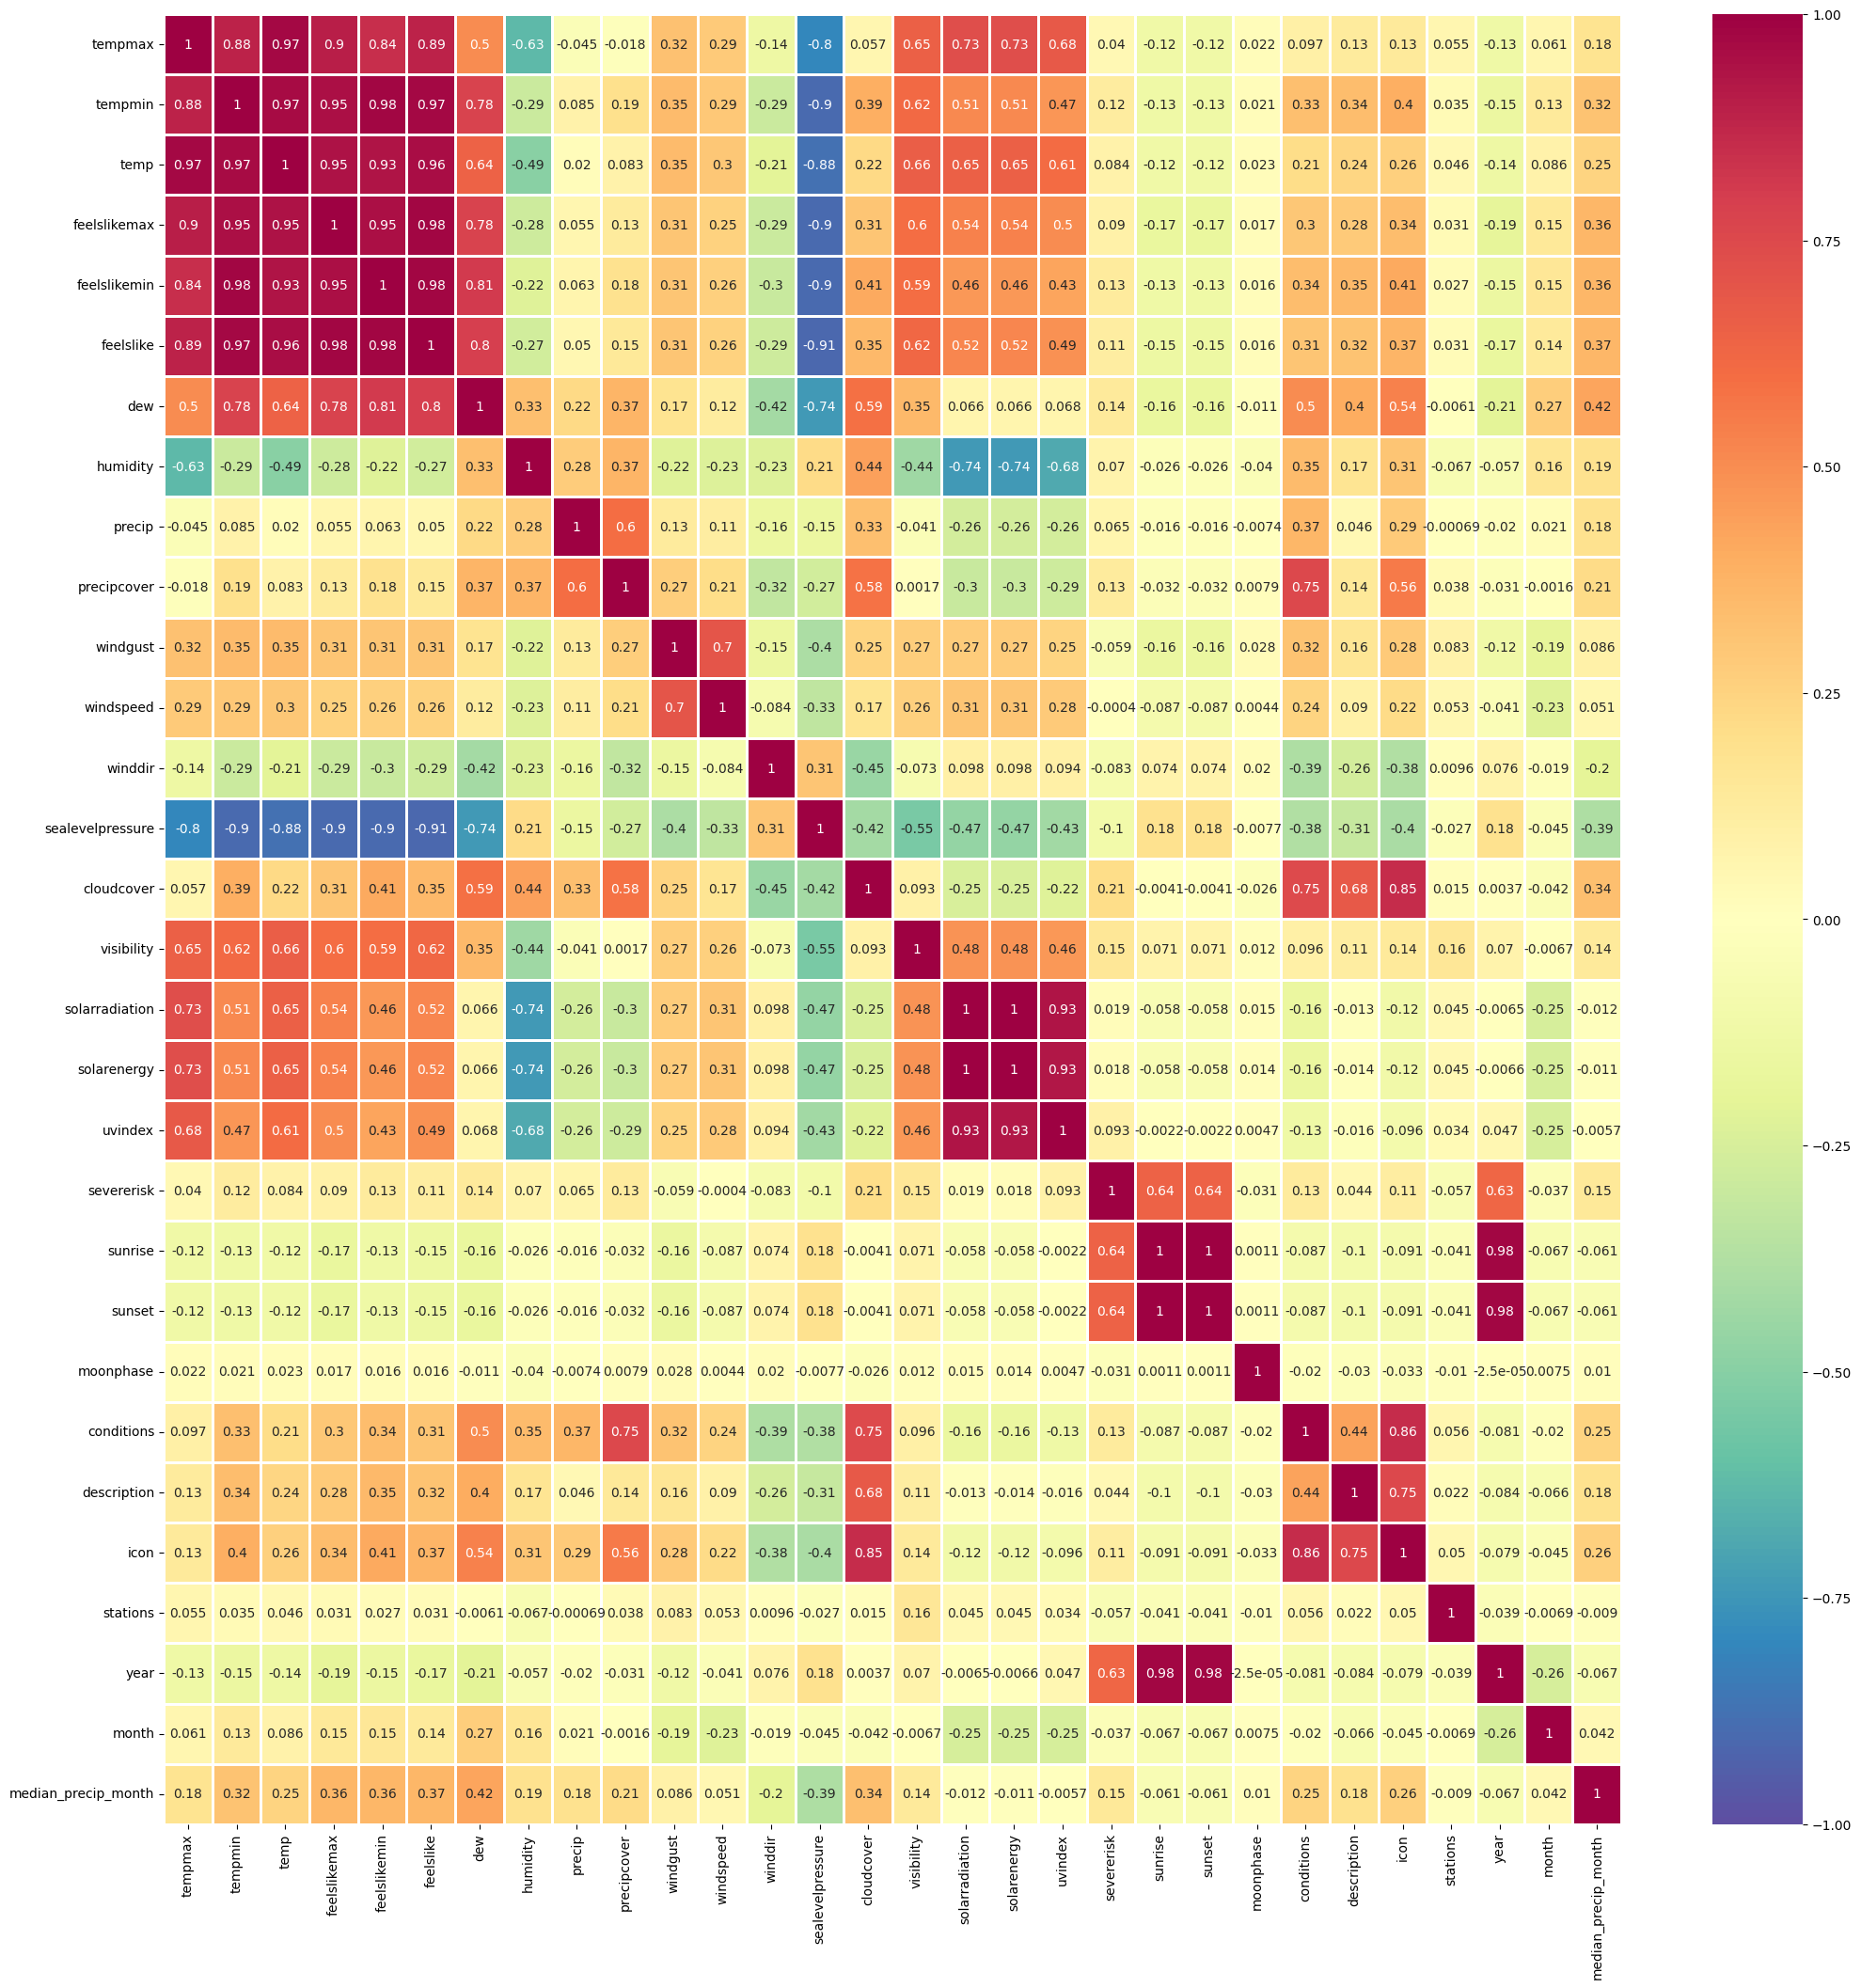

In [ ]:
fig, ax = plt.subplots(figsize = (25,25))

sns.heatmap(df_del_rain.corr(), annot=True, cmap='Spectral_r', vmin = -1, vmax = 1, linewidths=1)

## **Prediction Model By Taking the Correlation >= 0.3 and Correlation <= -0.3**

In [ ]:
correlation = df_del_rain.corr()['precip']
correlation

tempmax               -0.044726
tempmin                0.084934
temp                   0.019726
feelslikemax           0.055244
feelslikemin           0.062879
feelslike              0.050488
dew                    0.221316
humidity               0.278113
precip                 1.000000
precipcover            0.599455
windgust               0.128619
windspeed              0.113844
winddir               -0.155968
sealevelpressure      -0.151030
cloudcover             0.330229
visibility            -0.040734
solarradiation        -0.260572
solarenergy           -0.260656
uvindex               -0.258790
severerisk             0.064763
sunrise               -0.015763
sunset                -0.015763
moonphase             -0.007368
conditions             0.365356
description            0.046286
icon                   0.288833
stations              -0.000689
year                  -0.019506
month                  0.020980
median_precip_month    0.183289
Name: precip, dtype: float64

In [ ]:
drop_columns = correlation[abs(correlation) < 0.20].index.tolist()
drop_columns
df_temporary = df['month']
df_del_rain = df_del_rain.drop(columns = drop_columns)
df_del_rain['month'] = df_temporary

In [ ]:
y = df_del_rain['precip']

In [ ]:
x = df_del_rain.drop('precip', axis = 'columns')

In [ ]:
x.dtypes

dew               float64
humidity          float64
precipcover       float64
cloudcover        float64
solarradiation    float64
solarenergy       float64
uvindex             int64
conditions          int64
icon                int64
month               int32
dtype: object

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
print("Intecept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intecept:  3.737128809825859
Coefficients:


[('dew', 0.11376952524404339),
 ('humidity', 0.006111561175255839),
 ('precipcover', 1.8539088469474543),
 ('cloudcover', -0.04025512769984174),
 ('solarradiation', 0.02055697155507009),
 ('solarenergy', -0.3177479261944395),
 ('uvindex', -0.39974892884668906),
 ('conditions', -1.9683267496265864),
 ('icon', 1.577106082521576),
 ('month', -0.09364138450405951)]

In [ ]:
y_pred_mlr = mlr.predict(x_test)
y_pred_mlr

array([ 4.62045441e-02,  9.73827233e-01, -9.18188006e-01, -8.90572093e-01,
        1.05606353e+00,  3.89264595e-01,  6.27122464e-01,  6.45459297e-01,
       -1.98853012e-01,  2.48716318e+00,  5.56856447e-01,  4.55640387e+00,
       -1.89732926e+00,  6.82998539e-01, -2.29061967e-01, -1.82889851e+00,
        1.00782351e+01,  9.30347895e-01,  4.58520119e+00,  2.00010916e-01,
       -3.10386485e-01,  2.70822401e-01,  3.17471691e+00, -5.21426044e-01,
        4.28333344e-01, -2.71378152e-03,  1.82092970e+01,  1.07461743e+01,
        1.08048568e+00,  8.10146080e-01,  1.90238444e-02,  1.40545365e+00,
        3.44347002e+00,  4.42240562e+00, -3.98880182e-01,  3.50795353e-01,
       -5.27159205e-01,  6.03701498e-01,  1.71091588e+00, -1.09741324e+00,
        1.41086452e+00,  2.86210563e-01,  8.54681144e-01, -9.82501616e-01,
       -1.50435251e+00,  2.83811737e+00,  3.79751350e+01,  6.40661692e-01,
        5.18957244e-01,  2.67991080e+01,  1.41887419e-01,  1.11142918e+00,
        3.41193489e-01,  

In [ ]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(meanSqErr)
print('R squared : {:.6f}'. format(mlr.score(x, y)))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared : 0.383049
Mean Absolute Error: 3.180253698525438
Mean Square Error: 111.92256011971143
Root Mean Square Error: 10.579345921166933


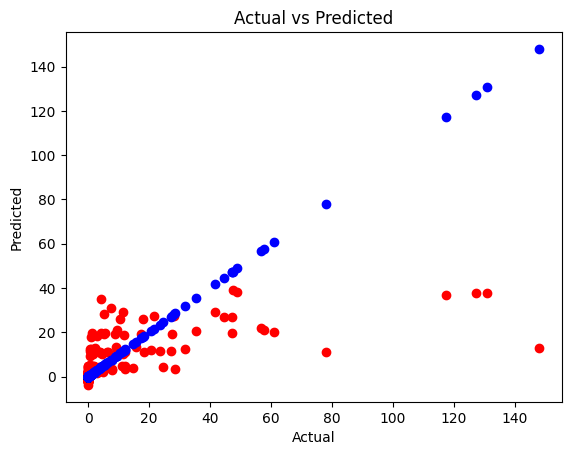

In [ ]:
plt.scatter(y_test, y_pred_mlr, color='red')
plt.scatter(y_test, y_test, color='blue')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()